<div style="display: flex; align-items: center; justify-content: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Escudo-UdeA.svg" width="150" style="margin-right: 20px;">
    <div>

# **Machine Learning I - Regresi√≥n**


# **Contenido**

1. Autores

2. Descripci√≥n corta del dataset

3. Objeto a desarrollar

4. Resumen del proceso realizado

5. Desarrollo de experimentos

‚Ä¢ 5.1 Preparaci√≥n de datos

‚Ä¢ 5.2 Divisi√≥n conjunto de datos.

6. Creaci√≥n, entrenamiento y valuaci√≥n entre modelos de clasificaci√≥n.

7. Conclusiones

8. Referencias


# **1. Autores**

### Cristhian Ocampo Bolivar

### Maria Isabel Duque Buitrago

### Leidy Estefan√≠a Silva Torres


# **2. Descripci√≥n corta del dataset**

La contaminaci√≥n del aire es un problema ambiental cr√≠tico con efectos significativos en la salud p√∫blica y el ecosistema. En este proyecto, aplicaremos t√©cnicas avanzadas de anal√≠tica de datos para examinar una base de datos que recopila registros de PM2.5 durante cuatro a√±os, junto con variables meteorol√≥gicas como temperatura (TEMP), presi√≥n atmosf√©rica (PRES), punto de roc√≠o (DEWP), acumulado de horas de nieve (Is), entre otras.

Antes de desarrollar modelos predictivos, se llevar√° a cabo un ETL, abordando aspectos clave como:

‚úî Manejo de valores nulos y datos inconsistentes.

‚úî Conversi√≥n de variables en formatos adecuados para el an√°lisis.

‚úî An√°lisis exploratorio de datos (EDA) para identificar correlaciones y patrones entre las variables clim√°ticas y la contaminaci√≥n.

A continuaci√≥n, se presenta una tabla con la definici√≥n de las variables utilizadas en el proyecto:

| Attribute Name | Definition                          |
| -------------- | ----------------------------------- |
| No             | No: row number                      |
| Year           | Year: year of data in this row      |
| Month          | Month: month of data in this row    |
| Day            | Day: day of data in this row        |
| Hour           | Hour: hour of data in this row      |
| PM2.5          | PM2.5: PM2.5 concentration (ug/m^3) |
| DEWP           | DEWP: Dew Point (‚ÑÉ)                 |
| TEMP           | TEMP: Temperature (‚ÑÉ)               |
| PRES           | PRES: Pressure (hPa)                |
| cbwd           | cbwd: Combined wind direction       |
| Iws            | Iws: Cumulated wind speed (m/s)     |
| Ir             | Ir: Cumulated hours of snow         |
| Is             | Is: Cumulated hours of rain         |


# **3. Objetivo a desarrollar**

El objetivo principal de este proyecto es desarrollar un sistema predictivo que permita estimar los niveles de concentraci√≥n de part√≠culas finas en suspensi√≥n (PM2.5) en el aire. Estas part√≠culas representan un importante riesgo para la salud p√∫blica y el medio ambiente, por lo que contar con herramientas que anticipen su comportamiento resulta fundamental para apoyar la toma de decisiones de medidas de alertas tempranas.

Para alcanzar este objetivo, se llevar√° a cabo el dise√±o, implementaci√≥n y validaci√≥n de m√∫ltiples modelos de Machine Learning, explorando diferentes tecnicas que puedan capturar patrones en los datos hist√≥ricos. Cada modelo ser√° entrenado utilizando un conjunto de datos con variables meteorol√≥gicas y temporales relevantes, y su rendimiento ser√° evaluado con m√©tricas estad√≠sticas apropiadas como el error cuadr√°tico medio (RMSE), el coeficiente de determinaci√≥n (R¬≤) y el error absoluto medio (MAE), entre otras.

Adem√°s, se busca crear una aplicaci√≥n interactiva que facilite el uso del modelo por parte de usuarios no t√©cnicos, permitiendo introducir condiciones clim√°ticas espec√≠ficas y obtener una predicci√≥n inmediata del nivel estimado de PM2.5.


# **4. Resumen del proceso realizado**

Este proyecto abord√≥ la predicci√≥n de contaminaci√≥n por PM2.5 utilizando datos clim√°ticos como temperatura, presi√≥n, viento y precipitaciones. Se limpiaron y transformaron los datos, se exploraron patrones relevantes mediante an√°lisis visual y estad√≠stico, y se entrenaron varios modelos de regresi√≥n. El modelo Random Forest obtuvo el mejor rendimiento con un R¬≤ de 0.84. Finalmente, se guard√≥ el modelo entrenado para su uso futuro, destacando su potencial para apoyar decisiones en salud p√∫blica y medio ambiente.


# **5. Desarrollo de experimentos**


Para el desarrollo de este proyecto se dise√±√≥ una estrategia experimental enfocada en la comparaci√≥n y evaluaci√≥n de distintos algoritmos de regresi√≥n, con el objetivo de seleccionar el modelo que mejor se desempe√±e al predecir los niveles futuros de PM2.5 a partir de datos meteorol√≥gicos y temporales.

Se han implementado seis modelos de regresi√≥n supervisada ampliamente utilizados en tareas de predicci√≥n:

- **Regresi√≥n Lineal (Linear Regression)**
- **√Årboles de Decisi√≥n (Decision Tree Regressor)**
- **Gradient Boosting Regressor**
- **K-Nearest Neighbors (KNN)**
- **Random Forest Regressor**
- **Support Vector Regressor (SVR)**

Cada uno de estos modelos fue entrenado utilizando un conjunto de datos preprocesado, y se aplicaron t√©cnicas de ajuste de hiperpar√°metros como Grid Search y Randomized Search, en combinaci√≥n con validaci√≥n cruzada (cross-validation), para optimizar su rendimiento y minimizar el riesgo de overfitting.


##5.1 ‚Ä¢ Preparaci√≥n de datos


Librerias


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder


import warnings
warnings.filterwarnings('ignore')

Carga de datos


In [ ]:
df = pd.read_csv('data.txt')
df.info()
df_m = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [ ]:
def conv_time(df):
    df['date']=pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df = df.set_index('date')
    return df
def drop_cols(df):
    df = df.drop(columns=['No', 'year','month', 'day','hour'])
    df.head()
    return df

df_m = conv_time(df_m)
df = conv_time(df)
df = drop_cols(df)
df

pm2.5  DEWP  TEMP    PRES cbwd     Iws  Is  Ir
date                                                               
2010-01-01 00:00:00    NaN   -21 -11.0  1021.0   NW    1.79   0   0
2010-01-01 01:00:00    NaN   -21 -12.0  1020.0   NW    4.92   0   0
2010-01-01 02:00:00    NaN   -21 -11.0  1019.0   NW    6.71   0   0
2010-01-01 03:00:00    NaN   -21 -14.0  1019.0   NW    9.84   0   0
2010-01-01 04:00:00    NaN   -20 -12.0  1018.0   NW   12.97   0   0
...                    ...   ...   ...     ...  ...     ...  ..  ..
2014-12-31 19:00:00    8.0   -23  -2.0  1034.0   NW  231.97   0   0
2014-12-31 20:00:00   10.0   -22  -3.0  1034.0   NW  237.78   0   0
2014-12-31 21:00:00   10.0   -22  -3.0  1034.0   NW  242.70   0   0
2014-12-31 22:00:00    8.0   -22  -4.0  1034.0   NW  246.72   0   0
2014-12-31 23:00:00   12.0   -21  -3.0  1034.0   NW  249.85   0   0

[43824 rows x 8 columns]

datos faltantes


In [ ]:
df['pm2.5'] = df['pm2.5'].replace(0, np.nan)
def null_pertenages(df):
    null_percentages = df.isnull().mean().mul(100).round(2)

    null_percentage_table = pd.DataFrame({
        'Column': null_percentages.index,
        'Null Percentage (%)': null_percentages.values
    })
    return null_percentage_table
null_pertenages(df)

Column  Null Percentage (%)
0  pm2.5                 4.72
1   DEWP                 0.00
2   TEMP                 0.00
3   PRES                 0.00
4   cbwd                 0.00
5    Iws                 0.00
6     Is                 0.00
7     Ir                 0.00

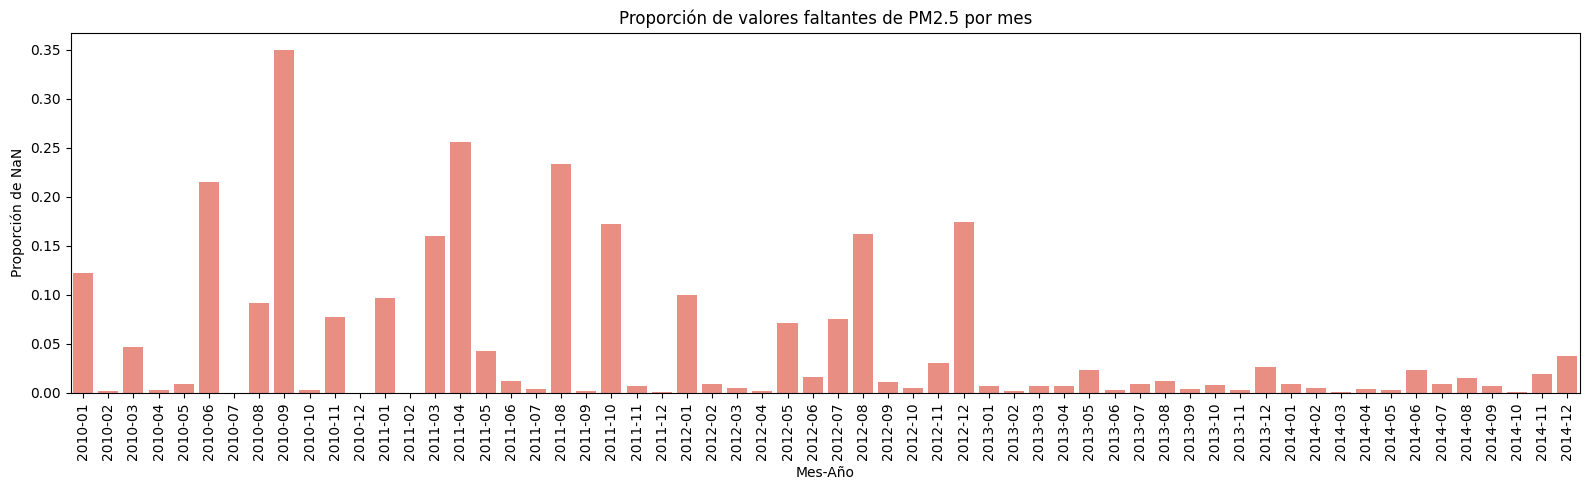

In [ ]:
miss = (
    df['pm2.5']
    .resample('M')
    .apply(lambda x: x.isna().mean())
    .reset_index()
)

miss['year_month'] = miss['date'].dt.strftime('%Y-%m')

plt.figure(figsize=(16, 5))
sns.barplot(data=miss, x='year_month', y='pm2.5', color='salmon')
plt.xticks(rotation=90)
plt.title('Proporci√≥n de valores faltantes de PM2.5 por mes')
plt.ylabel('Proporci√≥n de NaN')
plt.xlabel('Mes-A√±o')
plt.tight_layout()
plt.show()

Seg√∫n el an√°lisis de la base de datos, aproximadamente el 5% de los registros de contaminaci√≥n carecen de valores definidos en diferentes horas del d√≠a. Para preservar la integridad de los datos se eliminaron los valores nulos.


In [ ]:
def remove_null_pm25(df):
    return df.dropna(subset=['pm2.5'])
data = remove_null_pm25(df)
df_m = df_m.drop(columns=['No'])
df_m = remove_null_pm25(df_m)

In [ ]:
df_m = df_m.dropna(subset=['pm2.5'])
data = data.dropna(subset=['pm2.5'])
df = data
df

pm2.5  DEWP  TEMP    PRES cbwd     Iws  Is  Ir
date                                                               
2010-01-02 00:00:00  129.0   -16  -4.0  1020.0   SE    1.79   0   0
2010-01-02 01:00:00  148.0   -15  -4.0  1020.0   SE    2.68   0   0
2010-01-02 02:00:00  159.0   -11  -5.0  1021.0   SE    3.57   0   0
2010-01-02 03:00:00  181.0    -7  -5.0  1022.0   SE    5.36   1   0
2010-01-02 04:00:00  138.0    -7  -5.0  1022.0   SE    6.25   2   0
...                    ...   ...   ...     ...  ...     ...  ..  ..
2014-12-31 19:00:00    8.0   -23  -2.0  1034.0   NW  231.97   0   0
2014-12-31 20:00:00   10.0   -22  -3.0  1034.0   NW  237.78   0   0
2014-12-31 21:00:00   10.0   -22  -3.0  1034.0   NW  242.70   0   0
2014-12-31 22:00:00    8.0   -22  -4.0  1034.0   NW  246.72   0   0
2014-12-31 23:00:00   12.0   -21  -3.0  1034.0   NW  249.85   0   0

[41755 rows x 8 columns]

Visualizaci√≥n


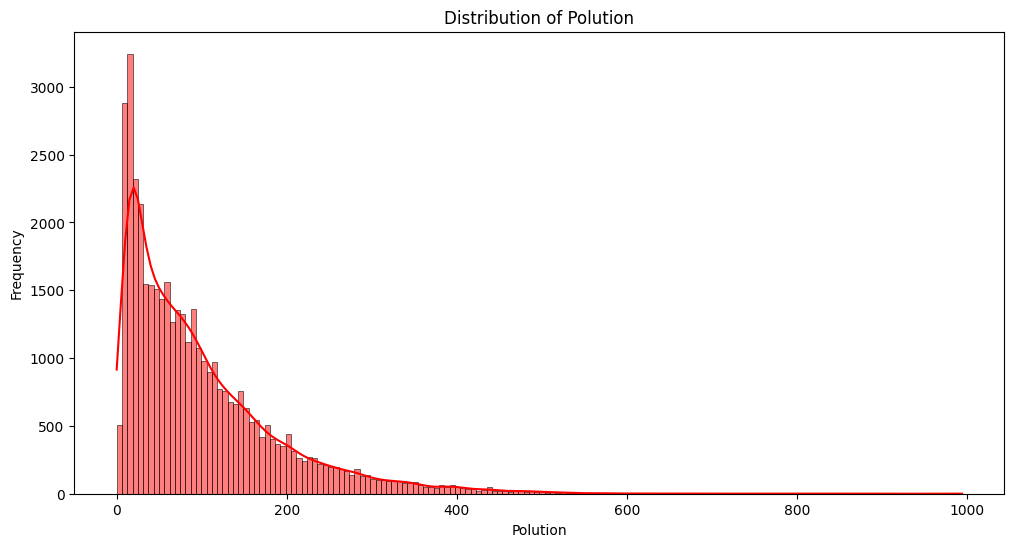

count    41757.000000
mean        98.613215
std         92.050387
min          0.000000
25%         29.000000
50%         72.000000
75%        137.000000
max        994.000000
Name: pm2.5, dtype: float64

In [ ]:
def distribution(df,n):
    polution = df['pm2.5']
    polution = np.power(polution, n)
    plt.figure(figsize=(12, 6))
    sns.histplot(polution, kde=True, color='r')
    plt.title('Distribution of Polution')
    plt.xlabel('Polution')
    plt.ylabel('Frequency')
    plt.show()
    return polution.describe()
distribution(df_m,1)

_Se observa una distribuci√≥n asim√©trica con una cola larga hacia la derecha. La mayor√≠a de los valores de contaminaci√≥n est√°n concentrados en niveles bajos, entre 0 y 200, con una frecuencia que disminuye gradualmente a medida que aumenta el nivel de contaminaci√≥n. De acuerdo al resultado obtenido se podr√≠a indicar que el nivel de contaminaci√≥n se ajusta a una distribuci√≥n exponencial decreciente._


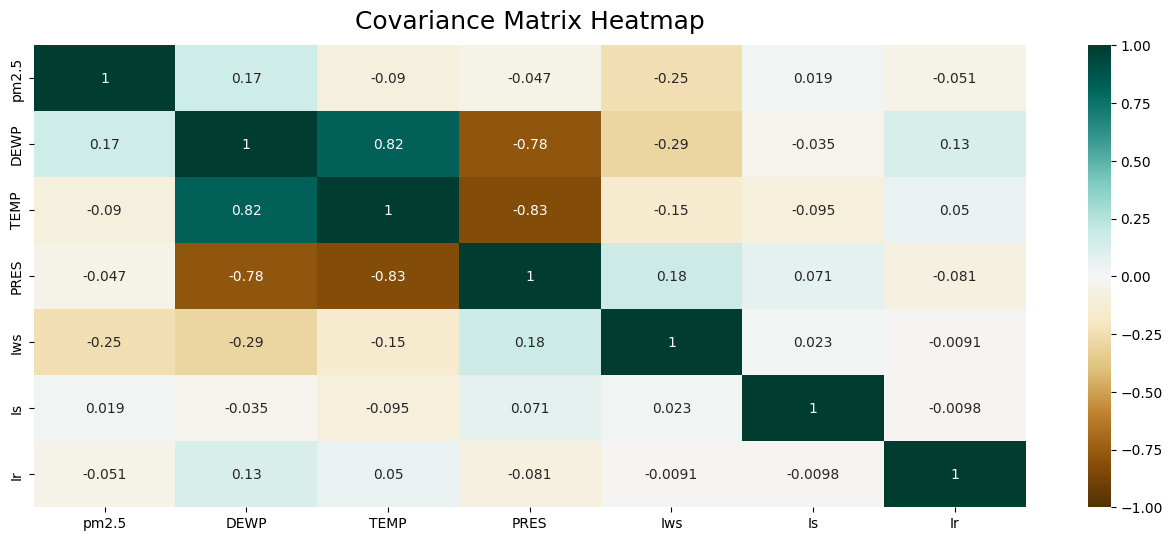

In [ ]:
def covariance_heatmap(df):
    data_num = df.drop(df.select_dtypes(include=['object']).columns,axis=1)
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(data_num.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Covariance Matrix Heatmap', fontdict={'fontsize':18}, pad=12);
covariance_heatmap(data)

_La matriz de covarianza revela las relaciones m√°s importantes entre las variables clim√°ticas y la concentraci√≥n de PM2.5:_

- **DEWP y TEMP** tienen una fuerte correlaci√≥n positiva (0.82), indicando que a mayor temperatura, tambi√©n aumenta el punto de roc√≠o.
- **PRES y TEMP** (-0.83) y **PRES y DEWP** (-0.78) muestran correlaciones negativas, sugiriendo que, en condiciones m√°s c√°lidas y h√∫medas, la presi√≥n atmosf√©rica disminuye.
- **Iws** tiene una correlaci√≥n negativa moderada con **PM2.5** (-0.24), indicando que a mayor velocidad del viento, aumentan los niveles de contaminaci√≥n.
- En resumen, la **humedad y la temperatura** influyen fuertemente en la **presi√≥n**, mientras que a mayor **velocidad de viento**, se genera una dispersi√≥n mejor de las particulas PM2.5 lo cual contribuye en una disminuci√≥n significativa de la contaminaci√≥n.


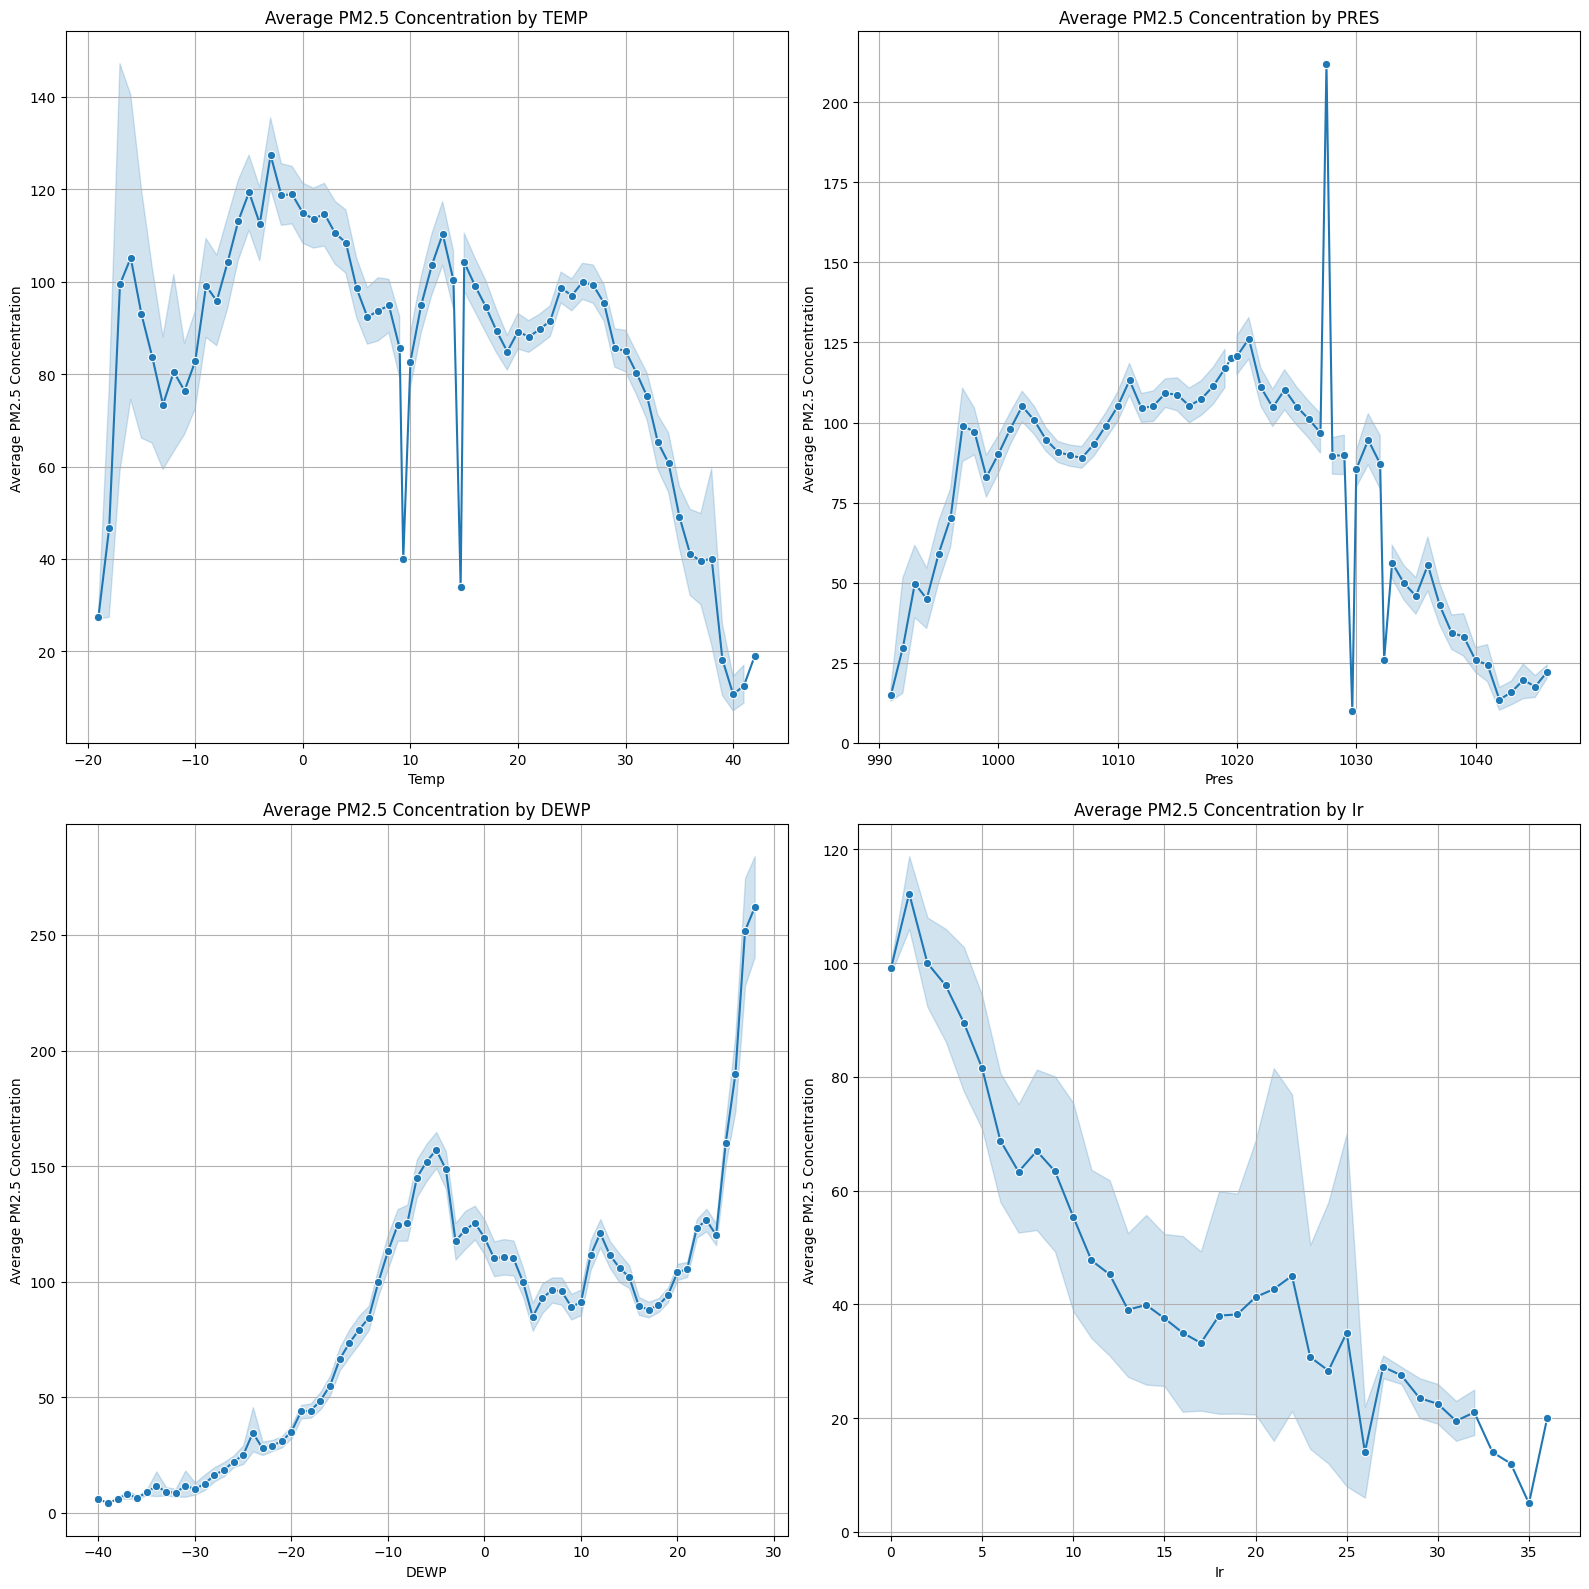

In [ ]:
def plot_pm25(df):
    plot_params = [
        {'x': 'TEMP', 'y': 'pm2.5', 'title': 'Average PM2.5 Concentration by TEMP', 'xlabel': 'Temp'},
        {'x': 'PRES', 'y': 'pm2.5', 'title': 'Average PM2.5 Concentration by PRES', 'xlabel': 'Pres'},
        {'x': 'DEWP', 'y': 'pm2.5', 'title': 'Average PM2.5 Concentration by DEWP', 'xlabel': 'DEWP'},
        {'x': 'Ir', 'y': 'pm2.5', 'title': 'Average PM2.5 Concentration by Ir', 'xlabel': 'Ir'},
    ]

    fig, axes = plt.subplots(2, 2, figsize=(16, 16))

    for i, params in enumerate(plot_params):
        row, col = divmod(i, 2)
        sns.lineplot(ax=axes[row, col], x=params['x'], y=params['y'], data=df, marker='o')
        axes[row, col].set_title(params['title'])
        axes[row, col].set_xlabel(params['xlabel'])
        axes[row, col].set_ylabel('Average PM2.5 Concentration')
        axes[row, col].grid(True)

    plt.tight_layout()
    plt.show()

plot_pm25(data)

Al observar la gr√°fica de PM2.5 en funci√≥n de la temperatura se puede observar que a temperaturas muy bajas (por debajo de 0¬∞C), la concentraci√≥n de PM2.5 tiende a decrecer. A temperaturas moderadas (entre 0¬∞C y 20¬∞C), la contaminaci√≥n tiende a mantenerse alta y estable. A temperaturas altas (por encima de 30¬∞C), la concentraci√≥n de PM2.5 disminuye dr√°sticamente. Se observa que se presenta una variabilidad entre los datos, que puede esta influenciada por otros agentes externos.

_La gr√°fica muestra la relaci√≥n entre la presi√≥n atmosf√©rica (PRES) y la concentraci√≥n promedio de PM2.5. Se observa un patr√≥n en el que a presiones bajas (<1020 hPa): La concentraci√≥n de PM2.5 es elevada, alcanzando valores entre 100 y 125 ¬µg/m¬≥. Esto indica que en condiciones de baja presi√≥n, el aire menos denso podr√≠a favorecer la acumulaci√≥n de contaminantes en la superficie. Por otra parte, a presiones altas (>1030 hPa), la concentraci√≥n de PM2.5 disminuye progresivamente, sugiriendo que una mayor presi√≥n atmosf√©rica favorece la dispersi√≥n de contaminantes y reduce los niveles de PM2.5._

_Por otra parte, a medida que el punto de roc√≠o (DEWP) aumenta, la concentraci√≥n de PM2.5 tambi√©n tiende a incrementarse. Adem√°s, a partir de DEWP = 20, se observa un aumento abrupto en la concentraci√≥n de PM2.5, que alcanza valores superiores a 250, lo que sugiere que cuando hay mayor humedad en el aire, la contaminaci√≥n tiende a empeorar significativamente._

_Finalmente, la cuarta gr√°fica sugiere que, a medida que aumentan las horas de lluvia, la concentraci√≥n de PM2.5 tiende a disminuir. La lluvia act√∫a como un agente de limpieza del aire, atrapando part√≠culas contaminantes y elimin√°ndolas del ambiente._


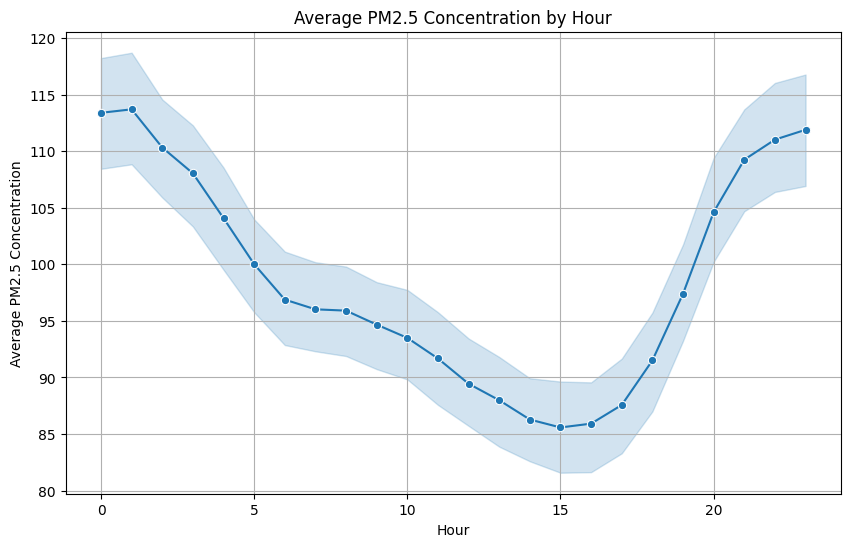

In [ ]:
def plot_hour(df):
    plt.figure(figsize=(10, 6))
    df_temp = df.copy()
    df_temp['hour'] = df_temp.index.hour

    sns.lineplot(x='hour', y='pm2.5', data=df_temp, marker='o')
    plt.title('Average PM2.5 Concentration by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Average PM2.5 Concentration')
    plt.grid(True)
    plt.show()

plot_hour(data)

La gr√°fica muestra el comportamiento de la concentraci√≥n promedio de PM2.5 a lo largo del d√≠a, revelando un patr√≥n c√≠clico con picos y descensos bien definidos. Durante el rango horario nocturno, desde las 7:00 PM hasta las 5:00 AM, la concentraci√≥n de PM2.5 es alta, alcanzando valores cercanos a 115, lo que indica un aumento de la poluci√≥n en este periodo.

Este comportamiento sugiere que hay momentos del d√≠a en los que la calidad del aire empeora notablemente. El incremento nocturno de la concentraci√≥n de PM2.5 podr√≠a estar relacionado con factores como la menor circulaci√≥n de aire, el aumento de la actividad industrial, y la acumulaci√≥n de contaminantes.

La disminuci√≥n observada durante la ma√±ana y el mediod√≠a podr√≠a deberse a una mayor actividad atmosf√©rica y a la ventilaci√≥n natural del aire. La variabilidad observada, con intervalos de confianza m√°s amplios en la madrugada y la tarde, podr√≠a reflejar fluctuaciones en los niveles de poluci√≥n debido al tr√°fico o a cambios en las condiciones meteorol√≥gicas.


preparaci√≥n de datos


In [ ]:
df_m

year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd  \
date                                                                          
2010-01-02 00:00:00  2010      1    2     0  129.0   -16  -4.0  1020.0   SE   
2010-01-02 01:00:00  2010      1    2     1  148.0   -15  -4.0  1020.0   SE   
2010-01-02 02:00:00  2010      1    2     2  159.0   -11  -5.0  1021.0   SE   
2010-01-02 03:00:00  2010      1    2     3  181.0    -7  -5.0  1022.0   SE   
2010-01-02 04:00:00  2010      1    2     4  138.0    -7  -5.0  1022.0   SE   
...                   ...    ...  ...   ...    ...   ...   ...     ...  ...   
2014-12-31 19:00:00  2014     12   31    19    8.0   -23  -2.0  1034.0   NW   
2014-12-31 20:00:00  2014     12   31    20   10.0   -22  -3.0  1034.0   NW   
2014-12-31 21:00:00  2014     12   31    21   10.0   -22  -3.0  1034.0   NW   
2014-12-31 22:00:00  2014     12   31    22    8.0   -22  -4.0  1034.0   NW   
2014-12-31 23:00:00  2014     12   31    23   12.0   -21  -3.0  1034.0   NW   

                        Iws  Is  Ir  
date                                 
2010-01-02 00:00:00    1.79   0   0  
2010-01-02 01:00:00    2.68   0   0  
2010-01-02 02:00:00    3.57   0   0  
2010-01-02 03:00:00    5.36   1   0  
2010-01-02 04:00:00    6.25   2   0  
...                     ...  ..  ..  
2014-12-31 19:00:00  231.97   0   0  
2014-12-31 20:00:00  237.78   0   0  
2014-12-31 21:00:00  242.70   0   0  
2014-12-31 22:00:00  246.72   0   0  
2014-12-31 23:00:00  249.85   0   0  

[41757 rows x 12 columns]

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
df_dum = encoder.fit_transform(df_m[['cbwd']])
df_dum = pd.DataFrame(df_dum, columns=encoder.get_feature_names_out(['cbwd']), index=df_m.index)
dummy_columns = encoder.get_feature_names_out(['cbwd']).tolist()
df_dum

cbwd_NE  cbwd_NW  cbwd_SE  cbwd_cv
date                                                   
2010-01-02 00:00:00      0.0      0.0      1.0      0.0
2010-01-02 01:00:00      0.0      0.0      1.0      0.0
2010-01-02 02:00:00      0.0      0.0      1.0      0.0
2010-01-02 03:00:00      0.0      0.0      1.0      0.0
2010-01-02 04:00:00      0.0      0.0      1.0      0.0
...                      ...      ...      ...      ...
2014-12-31 19:00:00      0.0      1.0      0.0      0.0
2014-12-31 20:00:00      0.0      1.0      0.0      0.0
2014-12-31 21:00:00      0.0      1.0      0.0      0.0
2014-12-31 22:00:00      0.0      1.0      0.0      0.0
2014-12-31 23:00:00      0.0      1.0      0.0      0.0

[41757 rows x 4 columns]

In [ ]:
df_m = pd.concat([df_m.drop(columns='cbwd'), df_dum], axis=1)
df_m

year  month  day  hour  pm2.5  DEWP  TEMP    PRES  \
date                                                                     
2010-01-02 00:00:00  2010      1    2     0  129.0   -16  -4.0  1020.0   
2010-01-02 01:00:00  2010      1    2     1  148.0   -15  -4.0  1020.0   
2010-01-02 02:00:00  2010      1    2     2  159.0   -11  -5.0  1021.0   
2010-01-02 03:00:00  2010      1    2     3  181.0    -7  -5.0  1022.0   
2010-01-02 04:00:00  2010      1    2     4  138.0    -7  -5.0  1022.0   
...                   ...    ...  ...   ...    ...   ...   ...     ...   
2014-12-31 19:00:00  2014     12   31    19    8.0   -23  -2.0  1034.0   
2014-12-31 20:00:00  2014     12   31    20   10.0   -22  -3.0  1034.0   
2014-12-31 21:00:00  2014     12   31    21   10.0   -22  -3.0  1034.0   
2014-12-31 22:00:00  2014     12   31    22    8.0   -22  -4.0  1034.0   
2014-12-31 23:00:00  2014     12   31    23   12.0   -21  -3.0  1034.0   

                        Iws  Is  Ir  cbwd_NE  cbwd_NW  cbwd_SE  cbwd_cv  
date                                                                     
2010-01-02 00:00:00    1.79   0   0      0.0      0.0      1.0      0.0  
2010-01-02 01:00:00    2.68   0   0      0.0      0.0      1.0      0.0  
2010-01-02 02:00:00    3.57   0   0      0.0      0.0      1.0      0.0  
2010-01-02 03:00:00    5.36   1   0      0.0      0.0      1.0      0.0  
2010-01-02 04:00:00    6.25   2   0      0.0      0.0      1.0      0.0  
...                     ...  ..  ..      ...      ...      ...      ...  
2014-12-31 19:00:00  231.97   0   0      0.0      1.0      0.0      0.0  
2014-12-31 20:00:00  237.78   0   0      0.0      1.0      0.0      0.0  
2014-12-31 21:00:00  242.70   0   0      0.0      1.0      0.0      0.0  
2014-12-31 22:00:00  246.72   0   0      0.0      1.0      0.0      0.0  
2014-12-31 23:00:00  249.85   0   0      0.0      1.0      0.0      0.0  

[41757 rows x 15 columns]

In [ ]:
X = df_m.drop('pm2.5', axis=1)
y = df_m['pm2.5']

Transformaciones.


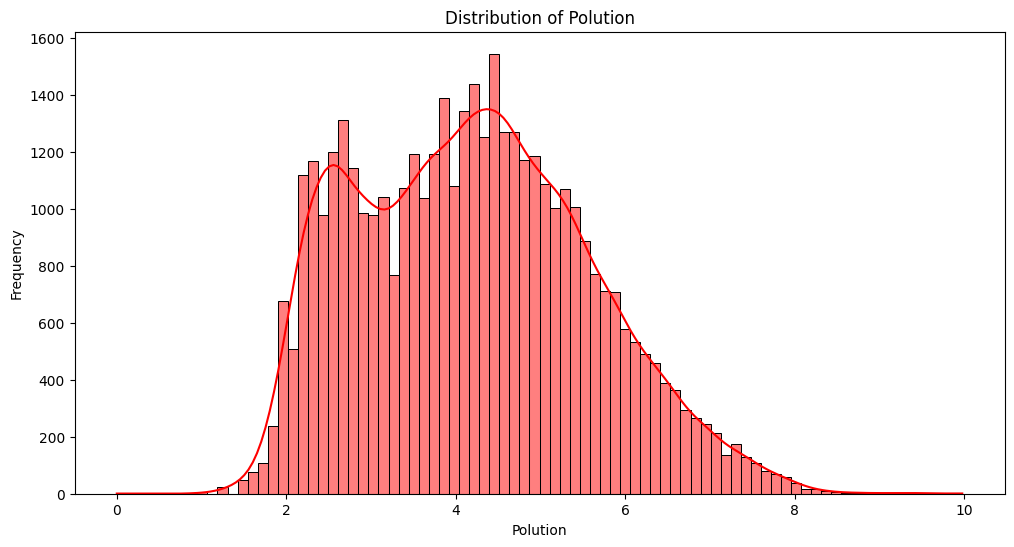

count    41757.000000
mean         4.200476
std          1.371547
min          0.000000
25%          3.072317
50%          4.160168
75%          5.155137
max          9.979960
Name: pm2.5, dtype: float64

In [ ]:
def distribution(df,n):
    polution = df['pm2.5']
    polution = np.power(polution, n)
    plt.figure(figsize=(12, 6))
    sns.histplot(polution, kde=True, color='r')
    plt.title('Distribution of Polution')
    plt.xlabel('Polution')
    plt.ylabel('Frequency')
    plt.show()
    return polution.describe()
distribution(df_m,1/3)

# 5.2 Divisi√≥n de los datos


In [ ]:
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

X_compl, X_test, y_compl, y_test = split_data(X, y)
X_train, X_val, y_train, y_val = split_data(X_compl, y_compl)

In [ ]:
X_compl.shape, X_train.shape, X_test.shape, X_val.shape, y_compl.shape , y_train.shape, y_test.shape, y_val.shape

((33405, 14),
 (26724, 14),
 (8352, 14),
 (6681, 14),
 (33405,),
 (26724,),
 (8352,),
 (6681,))

In [ ]:
numeric_cols = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'year', 'month', 'day', 'hour']
non_numeric_cols = ['cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']

scaler = MinMaxScaler()
scaler.fit(X_compl[numeric_cols])

def scale_and_combine(df):
    scaled_numeric = pd.DataFrame(scaler.transform(df[numeric_cols]), columns=numeric_cols, index=df.index)
    preserved_non_numeric = df[non_numeric_cols].copy()
    return pd.concat([scaled_numeric, preserved_non_numeric], axis=1)

X_compl = scale_and_combine(X_compl)
X_train = scale_and_combine(X_train)
X_test = scale_and_combine(X_test)
X_val = scale_and_combine(X_val)

# **6.Creaci√≥n, entrenamiento y valuaci√≥n entre modelos de clasificaci√≥n.**

Todos los modelos fueron evaluados de manera consistente, utilizando m√©tricas de desempe√±o como el error cuadr√°tico medio (RMSE), error absoluto medio (MAE) y coeficiente de determinaci√≥n (R¬≤), lo cual permitir√° identificar de manera objetiva cu√°l de ellos ser√° integrado en una futura aplicaci√≥n para la predicci√≥n de calidad del aire.


In [ ]:
def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def train_decision_tree(X_train, y_train):
    params = {'max_depth': [5, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
    grid = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

def train_gradient_boosting(X_train, y_train):
    params = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    grid = GridSearchCV(GradientBoostingRegressor(random_state=42), params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

def train_knn(X_train, y_train):
    params = {'n_neighbors': [5,10,15,20], 'weights': ['uniform', 'distance'],'p': [1, 2],'leaf_size': [10, 20, 30]}
    grid = GridSearchCV(KNeighborsRegressor(), params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

def train_random_forest(X_train, y_train):
    params = { 'n_estimators': [100, 200, 300, 400], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
    grid = RandomizedSearchCV( RandomForestRegressor(random_state=42), param_distributions=params, n_iter=50, cv=10, verbose=0, random_state=42, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

def train_svr(X_train, y_train):
    params = {'C': [0.1, 1], 'kernel': ['linear', 'rbf'], 'epsilon': [0.1, 0.2]}
    grid = GridSearchCV(SVR(), params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Modelo"):
    if hasattr(model, "best_estimator_"):
        best_model = model.best_estimator_
        best_params = model.best_params_
    else:
        best_model = model
        best_params = "N/A"

    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = mse_train ** 0.5
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = mse_test ** 0.5
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print(f'üìä {model_name} - TEST - MSE: {mse_test:.4f} | RMSE: {rmse_test:.4f} | MAE: {mae_test:.4f} | R¬≤: {r2_test:.4f}')
    print(f'üìä {model_name} - TRAIN - MSE: {mse_train:.4f} | RMSE: {rmse_train:.4f} | MAE: {mae_train:.4f} | R¬≤: {r2_train:.4f}')
    print(f'üîß {model_name} - Mejores hiperpar√°metros: {best_params}')

    return {
        'Modelo': model_name,
        'Train_MSE': mse_train,
        'Test_MSE': mse_test,
        'Train_RMSE': rmse_train,
        'Test_RMSE': rmse_test,
        'Train_MAE': mae_train,
        'Test_MAE': mae_test,
        'Train_R¬≤': r2_train,
        'Test_R¬≤': r2_test,
        'Mejores Hiperpar√°metros': best_params
    }

In [ ]:
def run_all_models(X_compl, X_train, X_test, y_compl, y_train, y_test):
    results = []
    trained_models = {}

    # Linear Regression con transformaci√≥n
    lr_model = train_linear_regression(X_train, np.cbrt(y_train))
    results.append(evaluate_model(lr_model, X_train, np.cbrt(y_train), X_test, np.cbrt(y_test), "Linear Regression"))
    trained_models["Linear Regression"] = lr_model

    # Decision Tree
    dt_model = train_decision_tree(X_compl, y_compl)
    results.append(evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Decision Tree"))
    trained_models["Decision Tree"] = dt_model

    # Gradient Boosting
    gb_model = train_gradient_boosting(X_compl, y_compl)
    results.append(evaluate_model(gb_model, X_train, y_train, X_test, y_test, "Gradient Boosting"))
    trained_models["Gradient Boosting"] = gb_model

    # KNN
    knn_model = train_knn(X_compl, y_compl)
    results.append(evaluate_model(knn_model, X_train, y_train, X_test, y_test, "KNN"))
    trained_models["KNN"] = knn_model

    # SVR
    svr_model = train_svr(X_compl, y_compl)
    results.append(evaluate_model(svr_model, X_train, y_train, X_test, y_test, "SVR"))
    trained_models["SVR"] = svr_model

    # Random Forest
    rf_model = train_random_forest(X_compl, y_compl)
    results.append(evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest"))
    trained_models["Random Forest"] = rf_model

    summary_df = pd.DataFrame(results).sort_values(by="Test_R¬≤", ascending=False)

    return results, summary_df, trained_models
results, summary_df, trained_models = run_all_models(X_compl, X_train, X_test, y_compl, y_train, y_test)

üìä Linear Regression - TEST - MSE: 1.1602 | RMSE: 1.0771 | MAE: 0.8528 | R¬≤: 0.3856
üìä Linear Regression - TRAIN - MSE: 1.1480 | RMSE: 1.0714 | MAE: 0.8565 | R¬≤: 0.3867
üîß Linear Regression - Mejores hiperpar√°metros: N/A
üìä Decision Tree - TEST - MSE: 3739.3202 | RMSE: 61.1500 | MAE: 40.5558 | R¬≤: 0.5756
üìä Decision Tree - TRAIN - MSE: 2847.2208 | RMSE: 53.3594 | MAE: 36.5314 | R¬≤: 0.6560
üîß Decision Tree - Mejores hiperpar√°metros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
üìä Gradient Boosting - TEST - MSE: 2767.7170 | RMSE: 52.6091 | MAE: 34.8250 | R¬≤: 0.6859
üìä Gradient Boosting - TRAIN - MSE: 2088.1494 | RMSE: 45.6963 | MAE: 31.7039 | R¬≤: 0.7477
üîß Gradient Boosting - Mejores hiperpar√°metros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
üìä KNN - TEST - MSE: 2132.6049 | RMSE: 46.1801 | MAE: 26.9749 | R¬≤: 0.7580
üìä KNN - TRAIN - MSE: 0.0000 | RMSE: 0.0000 | MAE: 0.0000 | R¬≤: 1.0000
üîß KNN - Mejores hiperpar√°metr

In [ ]:
display(summary_df)

Modelo    Train_MSE     Test_MSE  Train_RMSE  Test_RMSE  \
5      Random Forest   162.061967  1382.973261   12.730356  37.188348   
3                KNN     0.000000  2132.604942    0.000000  46.180136   
2  Gradient Boosting  2088.149350  2767.716951   45.696273  52.609096   
1      Decision Tree  2847.220839  3739.320195   53.359356  61.149981   
0  Linear Regression     1.147999     1.160232    1.071447   1.077141   
4                SVR  7018.384876  7534.887073   83.775801  86.803727   

   Train_MAE   Test_MAE  Train_R¬≤   Test_R¬≤  \
5   7.947601  21.912710  0.980420  0.843049   
3   0.000000  26.974907  1.000000  0.757975   
2  31.703926  34.824972  0.747712  0.685898   
1  36.531379  40.555815  0.656001  0.575633   
0   0.856528   0.852757  0.386683  0.385623   
4  54.024805  54.400857  0.152045  0.144882   

                             Mejores Hiperpar√°metros  
5  {'n_estimators': 400, 'min_samples_split': 2, ...  
3  {'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'w...  
2  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  
1  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...  
0                                                N/A  
4       {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}

Modelo    Train_MSE     Test_MSE  Train_RMSE  Test_RMSE  \
5      Random Forest   162.061967  1382.973261   12.730356  37.188348   
3                KNN     0.000000  2132.604942    0.000000  46.180136   
2  Gradient Boosting  2088.149350  2767.716951   45.696273  52.609096   
1      Decision Tree  2847.220839  3739.320195   53.359356  61.149981   
0  Linear Regression     1.147999     1.160232    1.071447   1.077141   
4                SVR  7018.384876  7534.887073   83.775801  86.803727   

   Train_MAE   Test_MAE  Train_R¬≤   Test_R¬≤  \
5   7.947601  21.912710  0.980420  0.843049   
3   0.000000  26.974907  1.000000  0.757975   
2  31.703926  34.824972  0.747712  0.685898   
1  36.531379  40.555815  0.656001  0.575633   
0   0.856528   0.852757  0.386683  0.385623   
4  54.024805  54.400857  0.152045  0.144882   

                             Mejores Hiperpar√°metros  
5  {'n_estimators': 400, 'min_samples_split': 2, ...  
3  {'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'w...  
2  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  
1  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...  
0                                                N/A  
4       {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}

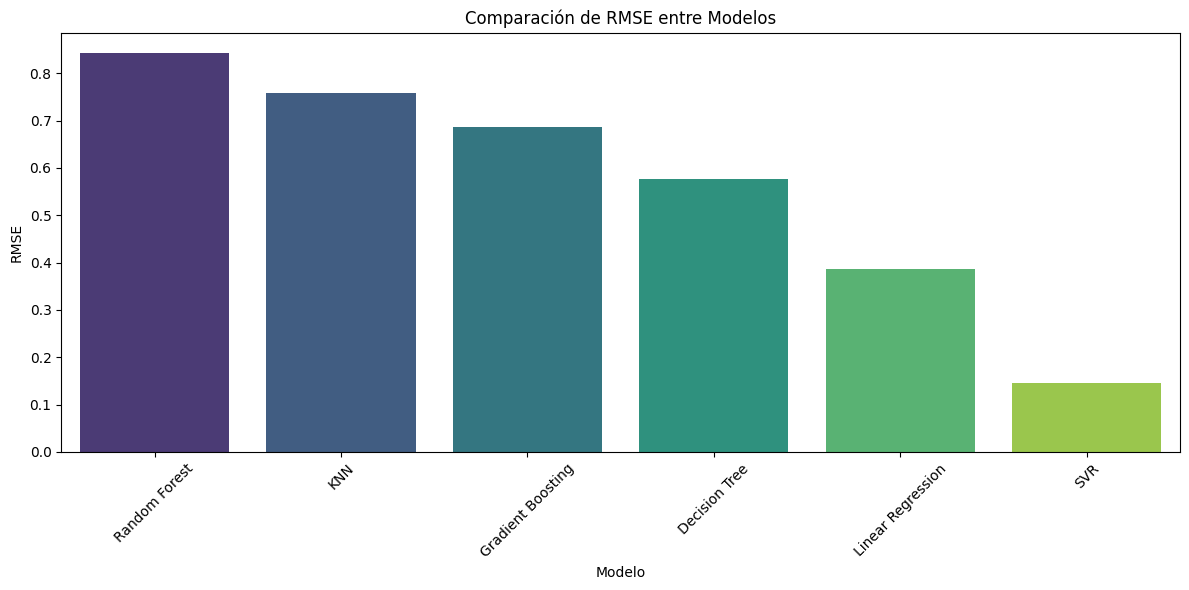

In [ ]:
def graficar_resultados(summary_df):
    display(summary_df)

    plt.figure(figsize=(12, 6))
    sns.barplot(x="Modelo", y="Test_R¬≤", data=summary_df, palette="viridis")
    plt.title("Comparaci√≥n de RMSE entre Modelos")
    plt.xticks(rotation=45)
    plt.ylabel("RMSE")
    plt.tight_layout()
    plt.show()
graficar_resultados(summary_df)

# Analisis de resultados de los modelos entrenados:

Debido a los resultados obtenidos con Random Forest frente a los dem√°s modelos, se optar√° por este modelo, ya que presenta un mejor rendimiento seg√∫n sus m√©tricas, como **MSE, MAE y R¬≤**.

A continuaci√≥n, se analizan los resultados obtenidos con el modelo **Random Forest**:

- **Error Cuadr√°tico Medio (MSE)**

El valor de 1213.16 representa el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales. Cuanto m√°s bajo sea este valor, mejor es el ajuste del modelo.

- **Ra√≠z del Error Cuadr√°tico Medio (RMSE)**

El valor de 34.83 indica que, en promedio, las predicciones del modelo se desv√≠an del valor real en aproximadamente 34.8 unidades. Esta m√©trica es sensible a errores grandes.

- **Error Absoluto Medio (MAE)**

Con un valor de 21.71, se interpreta que las predicciones del modelo se desv√≠an, en promedio, unas 21.7 unidades del valor real, sin importar si la predicci√≥n fue mayor o menor.

- **R¬≤ (Coeficiente de Determinaci√≥n)**

El valor de 0.8473 sugiere que el modelo explica aproximadamente el 84.7% de la variabilidad en los valores de pm2.5 a partir de las variables predictoras utilizadas.


# **7. Conclusiones.**

- A lo largo del proyecto se analiz√≥ la relaci√≥n entre la concentraci√≥n de part√≠culas contaminantes PM2.5 y variables meteorol√≥gicas como la temperatura, presi√≥n atmosf√©rica, punto de roc√≠o, intensidad del viento, as√≠ como las horas acumuladas de precipitaci√≥n. Este an√°lisis permiti√≥ detectar patrones y correlaciones significativas que afectan los niveles de contaminaci√≥n, aportando una base s√≥lida para la modelizaci√≥n predictiva y decisiones basadas en evidencia.

- Se integraron diversas t√©cnicas de ciencia de datos, incluyendo an√°lisis exploratorio, visualizaci√≥n y evaluaci√≥n de modelos predictivos, con el objetivo de comprender de forma integral los factores que inciden en la contaminaci√≥n del aire. Esta combinaci√≥n permiti√≥ no solo extraer insights valiosos, sino tambi√©n validar el comportamiento de diferentes algoritmos en el contexto del problema.

- Entre los modelos evaluados, Random Forest fue el que obtuvo el mejor desempe√±o, alcanzando un R¬≤ de 0.84 al predecir los niveles de PM2.5. Este resultado sugiere que este algoritmo es capaz de capturar relaciones no lineales y complejas entre las variables meteorol√≥gicas y los niveles de contaminaci√≥n, siendo una herramienta efectiva para tareas de monitoreo y pron√≥stico ambiental.


# **8. Referencias.**

- Metodos de regresi√≥n: https://scikit-learn.org/stable/supervised_learning.html

- Dataset empleado: https://www.kaggle.com/datasets/djhavera/beijing-pm25-data-data-set

- Escalar los datos: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

- Metricas de evaluaci√≥n: https://scikit-learn.org/stable/modules/model_evaluation.html

- Dummificaci√≥n: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


In [ ]:
joblib.dump(trained_models["Random Forest"], "random_forest_model.pkl")
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(dummy_columns, 'cbwd_columns.pkl')

['cbwd_columns.pkl']

# <p style="background-color:hsla(50, 33%, 25%, .75);; font-family:calibri; color:white; font-size:70%; text-align:center; border-radius:50px 50px;">EJEMPLO</p>


In [ ]:
# 1. Punto crudo de entrada
sample = {
    'year': 2025,
    'month': 5,
    'day': 3,
    'hour': 2,
    'DEWP': -18,
    'TEMP': 15.0,
    'PRES': 1021.0,
    'cbwd': 'NW',
    'Iws': 1.79,
    'Is': 0,
    'Ir': 0}

# 2. Convertir en DataFrame
df_sample = pd.DataFrame([sample])

# 3. Cargar scaler, modelo y columnas dummy
scaler = joblib.load("scaler.pkl")
model = joblib.load("random_forest_model.pkl")
dummy_columns = joblib.load("cbwd_columns.pkl")  # debe contener ['cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']

# 4. Escalar variables num√©ricas
numeric_cols = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'year', 'month', 'day', 'hour']
scaled_numeric = pd.DataFrame(
    scaler.transform(df_sample[numeric_cols]),
    columns=numeric_cols
)

# 5. Generar columnas dummy para cbwd
cbwd_value = df_sample['cbwd'].iloc[0].strip()
cbwd_dummies = {col: 0 for col in dummy_columns}
col_name = f'cbwd_{cbwd_value}'
if col_name in cbwd_dummies:
    cbwd_dummies[col_name] = 1
cbwd_df = pd.DataFrame([cbwd_dummies])

# 6. Concatenar y asegurar orden correcto
input_model = pd.concat([scaled_numeric, cbwd_df], axis=1)
input_model = input_model[numeric_cols + dummy_columns]

# 7. Realizar predicci√≥n
prediction = model.predict(input_model)
print(f"Predicci√≥n del modelo Random Forest para el dato sint√©tico: {prediction[0]:.2f}")

Predicci√≥n del modelo Random Forest para el dato sint√©tico: 23.91
